<a href="https://colab.research.google.com/github/Fasiloc/Machine_Learning_learn-repo/blob/main/Classes/Day_22_Artificial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [ ]:
data=pd.read_csv('HR_comma_sep.csv')

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.head()
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
features=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','sales','salary']

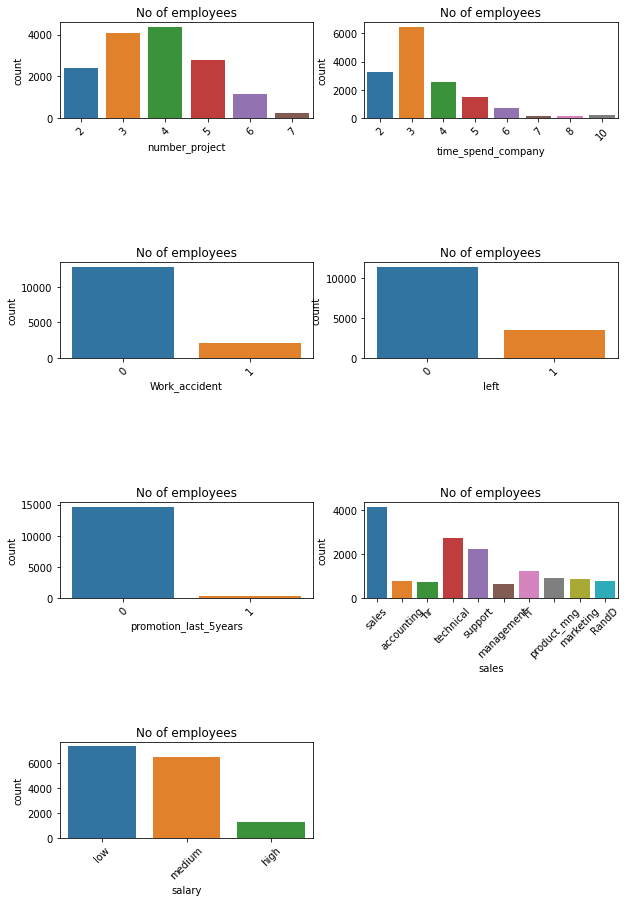

In [ ]:
fig=plt.subplots(figsize=(10,15))

for i,j in enumerate(features):
  plt.subplot(4 ,2 ,i+1)
  plt.subplots_adjust(hspace = 1.5)
  sns.countplot(x=j,data = data)
  plt.xticks(rotation=45)
  plt.title('No of employees')

Data pre processing

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder() #creating label encoder
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

split the data

In [ ]:
from sklearn.preprocessing import StandardScaler

x = data.drop(['left'],axis=1)
y = data['left']

# scaling features

sc= StandardScaler()
X=sc.fit_transform(x)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42) # 80% training 20% testing

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,6),
                    activation='logistic',
                    solver='adam',
                    verbose=True,
                    max_iter=250,
                    validation_fraction=0.2,
                    learning_rate_init=0.01)

In [ ]:
# fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.54499587
Iteration 2, loss = 0.49440898
Iteration 3, loss = 0.40798713
Iteration 4, loss = 0.35192369
Iteration 5, loss = 0.31208789
Iteration 6, loss = 0.28664538
Iteration 7, loss = 0.26923951
Iteration 8, loss = 0.25377077
Iteration 9, loss = 0.23511230
Iteration 10, loss = 0.21326815
Iteration 11, loss = 0.19487814
Iteration 12, loss = 0.18323203
Iteration 13, loss = 0.17547030
Iteration 14, loss = 0.17062576
Iteration 15, loss = 0.16646503
Iteration 16, loss = 0.16206431
Iteration 17, loss = 0.15854333
Iteration 18, loss = 0.15626708
Iteration 19, loss = 0.15343307
Iteration 20, loss = 0.15200872
Iteration 21, loss = 0.14905259
Iteration 22, loss = 0.14739840
Iteration 23, loss = 0.14635351
Iteration 24, loss = 0.14481238
Iteration 25, loss = 0.14314345
Iteration 26, loss = 0.14238264
Iteration 27, loss = 0.14171295
Iteration 28, loss = 0.14059285
Iteration 29, loss = 0.13982634
Iteration 30, loss = 0.13924631
Iteration 31, loss = 0.13892540
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 6),
              learning_rate_init=0.01, max_iter=250, validation_fraction=0.2,
              verbose=True)

In [ ]:
# make prediction on test data
ypred=clf.predict(X_test)

In [ ]:
#import accuracy score
from sklearn.metrics import accuracy_score

# calculate Accuracy
accuracy_score(y_test,ypred)


0.9626666666666667

## KERAS 

In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv('HR_comma_sep.csv')

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder() #creating label encoder
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

In [ ]:
from sklearn.preprocessing import StandardScaler

x = data.drop(['left'],axis=1)
y = data['left']


In [ ]:
# convert dataframe into numpy array
x=x.values
y=y.values

# scaling features

sc= StandardScaler()
X=sc.fit_transform(x)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=42) # 80% training 20% testing


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()

model.add(Dense(6,input_dim=9,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

optimizers : adadelta, sgd, rmsprop

In [ ]:
from sklearn import metrics
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=50, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/50
165/165 [==============================] - 2s 7ms/step - loss: 0.5944 - accuracy: 0.6859 - val_loss: 0.5025 - val_accuracy: 0.7618
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.7620 - val_loss: 0.3985 - val_accuracy: 0.7618
Epoch 3/50
165/165 [==============================] - 1s 3ms/step - loss: 0.3594 - accuracy: 0.7620 - val_loss: 0.3393 - val_accuracy: 0.7618
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.7620 - val_loss: 0.3062 - val_accuracy: 0.7618
Epoch 5/50
165/165 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8457 - val_loss: 0.2845 - val_accuracy: 0.9073
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 0.2687 - accuracy: 0.9277 - val_loss: 0.2681 - val_accuracy: 0.9302
Epoch 7/50
165/165 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9398 - val_loss: 0.2555 - val_accuracy: 0.9376
Epoch 

In [ ]:
score = model.evaluate(X_test,y_test,verbose=1)
print(score)

141/141 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9540
[0.1662399023771286, 0.9539999961853027]


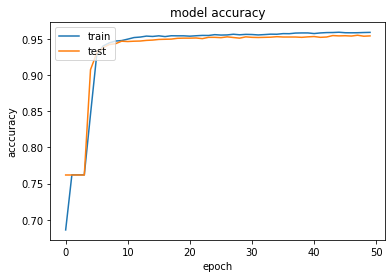

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acccuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()



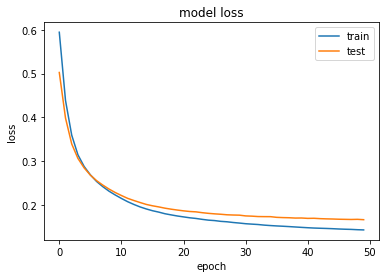

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()
